In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 19.3 s (started: 2024-08-23 16:57:17 +00:00)


In [4]:
from google.colab import files
import os
import shutil

os.makedirs('/content/data', exist_ok=True)

# Copy the data files from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/data/data_p14_preprocessed.csv', '/content/data/data_p14_preprocessed.csv')

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/random_forest_classifier.py', '/content/random_forest_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils_rfe.py', '/content/utils.py')

'/content/utils.py'

time: 6.52 s (started: 2024-08-23 16:57:37 +00:00)


# Error (recording) condition Random Forest classifier

As the classification using the audio source only is quite poor using the MLP still, we wish to test if using a random forest classifier would improve the performance of the classifier.

In [5]:
# Example of calling the function
DATA_FILE = 'data/data_p14_preprocessed.csv'
RANDOM_STATE = 42

from random_forest_classifier import train_random_forest, evaluate_random_forest
from utils import prepare_data, plot_confusion_matrix, standardize_x_data, remove_specified_conditions
from sklearn.model_selection import train_test_split

time: 5.03 s (started: 2024-08-23 16:57:43 +00:00)


# 1. All Data

Mean cross-validated F1 score: 0.9999818443432407
f1 score:  0.9999273886063904
Classification Report:
                   precision    recall  f1-score   support

high_articulation       1.00      1.00      1.00      1958
 low_articulation       1.00      1.00      1.00      1956
  chest_breathing       1.00      1.00      1.00      2196
          correct       1.00      1.00      1.00      1897
     hunched_back       1.00      1.00      1.00      1938
         sideways       1.00      1.00      1.00      1807
      arched_back       1.00      1.00      1.00      2020

         accuracy                           1.00     13772
        macro avg       1.00      1.00      1.00     13772
     weighted avg       1.00      1.00      1.00     13772



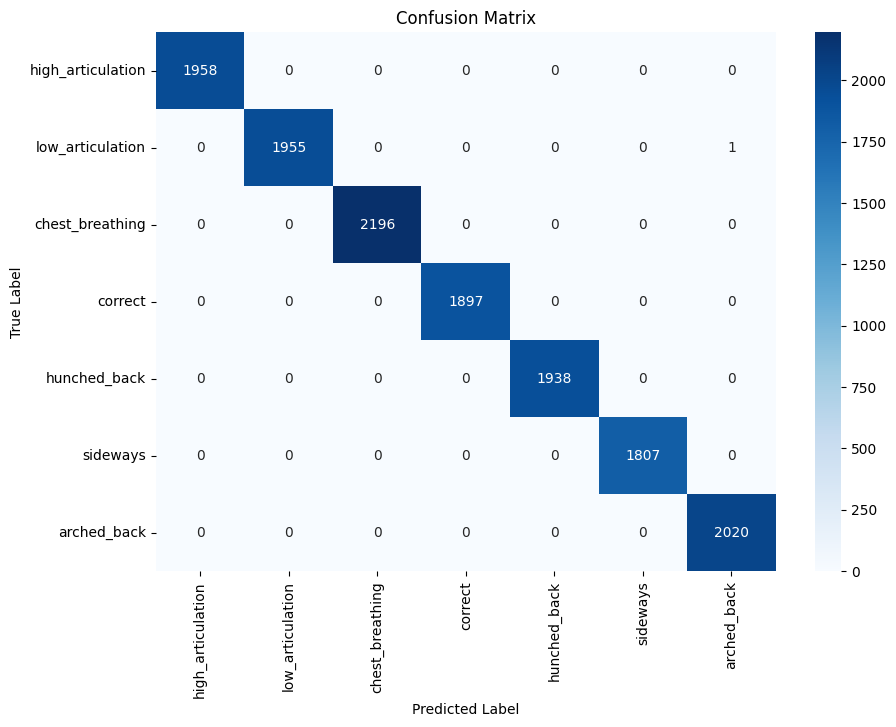

time: 9min 35s (started: 2024-08-06 14:37:01 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition')
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

# Evaluate on test set
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 features

Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.868707951756495
f1 score:  0.8761608361995455
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.94      0.95      0.95      1958
 low_articulation       0.80      0.77      0.78      1956
  chest_breathing       0.89      0.90      0.90      2196
          correct       0.78      0.80      0.79      1897
     hunched_back       0.99      1.00      0.99      1938
         sideways       0.76      0.77      0.76      1807
      arched_back       0.96      0.93      0.95      2020

         accuracy                           0.88     13772
        macro avg       0.87      0.87      0.87     13772
     weighted avg       0.88      0.88      0.88     13772



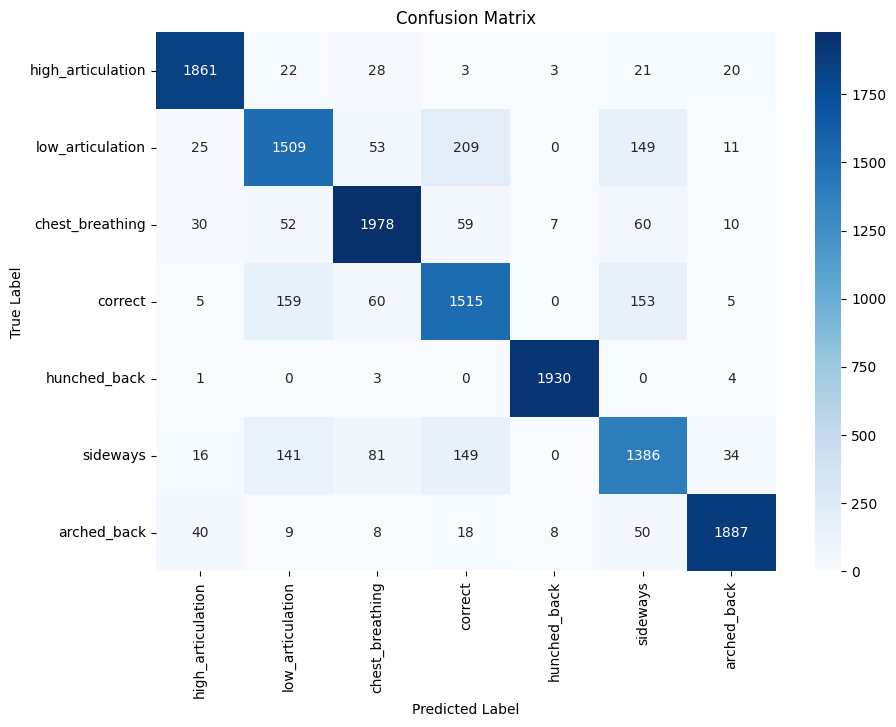

time: 4min 41s (started: 2024-08-06 14:46:37 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# 2. Audio only

In [ ]:
modalities = [
    "audio"
]

time: 1.52 ms (started: 2024-08-09 06:07:52 +00:00)


Mean cross-validated F1 score: 0.5192863112800208
f1 score:  0.5282250905499986
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.52      0.52      0.52      1958
 low_articulation       0.50      0.56      0.53      1956
  chest_breathing       0.49      0.54      0.51      2196
          correct       0.60      0.55      0.57      1897
     hunched_back       0.52      0.52      0.52      1938
         sideways       0.56      0.52      0.54      1807
      arched_back       0.54      0.49      0.51      2020

         accuracy                           0.53     13772
        macro avg       0.53      0.53      0.53     13772
     weighted avg       0.53      0.53      0.53     13772



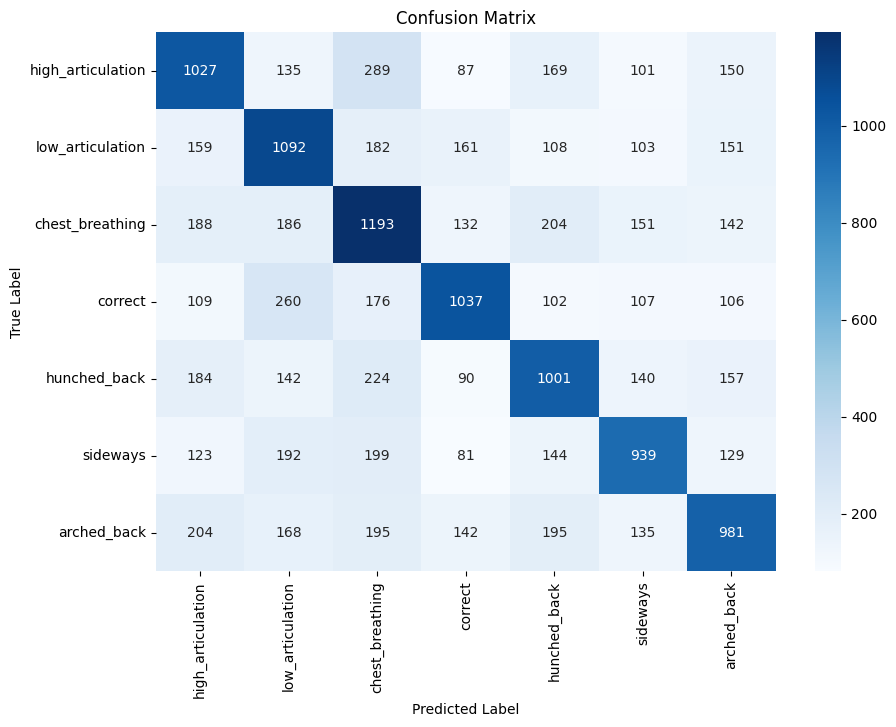

time: 12min 24s (started: 2024-08-06 14:51:19 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 audio features

Sklearn SelectKBest

Selected features:  Index(['computer_spec_cent', 'computer_tristimulus3', 'computer_mfcc_1',
       'computer_mfcc_3', 'computer_mfcc_7'],
      dtype='object')
Mean cross-validated F1 score: 0.2912423118673123
f1 score:  0.29118558859908766
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.29      0.31      0.30      1958
 low_articulation       0.29      0.29      0.29      1956
  chest_breathing       0.27      0.30      0.28      2196
          correct       0.33      0.32      0.33      1897
     hunched_back       0.27      0.27      0.27      1938
         sideways       0.32      0.28      0.30      1807
      arched_back       0.29      0.27      0.28      2020

         accuracy                           0.29     13772
        macro avg       0.29      0.29      0.29     13772
     weighted avg       0.29      0.29      0.29     13772



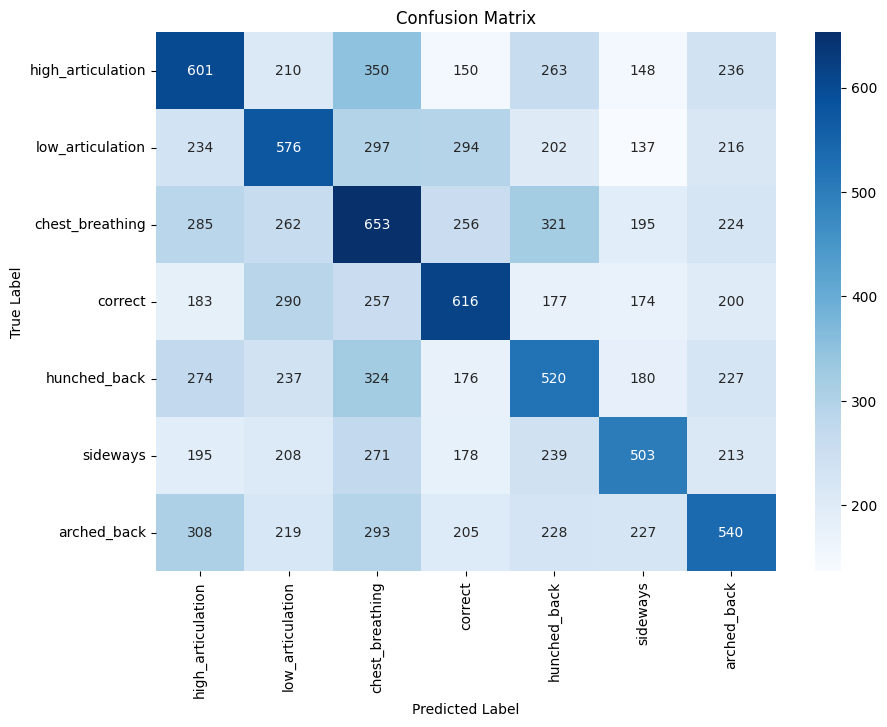

time: 6min 16s (started: 2024-08-06 15:24:09 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Trying different feature selectors

### CFS

In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=3, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### RFE

Selected features:  Index(['computer_pitch', 'computer_rms_energy', 'computer_tristimulus2',
       'computer_mfcc_1', 'computer_mfcc_3'],
      dtype='object')
Mean cross-validated F1 score: 0.4141722150585192
f1 score:  0.4308352695635241
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.45      0.46      0.46      1958
 low_articulation       0.42      0.45      0.43      1956
  chest_breathing       0.42      0.45      0.43      2196
          correct       0.46      0.42      0.44      1897
     hunched_back       0.41      0.41      0.41      1938
         sideways       0.43      0.41      0.42      1807
      arched_back       0.44      0.41      0.43      2020

         accuracy                           0.43     13772
        macro avg       0.43      0.43      0.43     13772
     weighted avg       0.43      0.43      0.43     13772



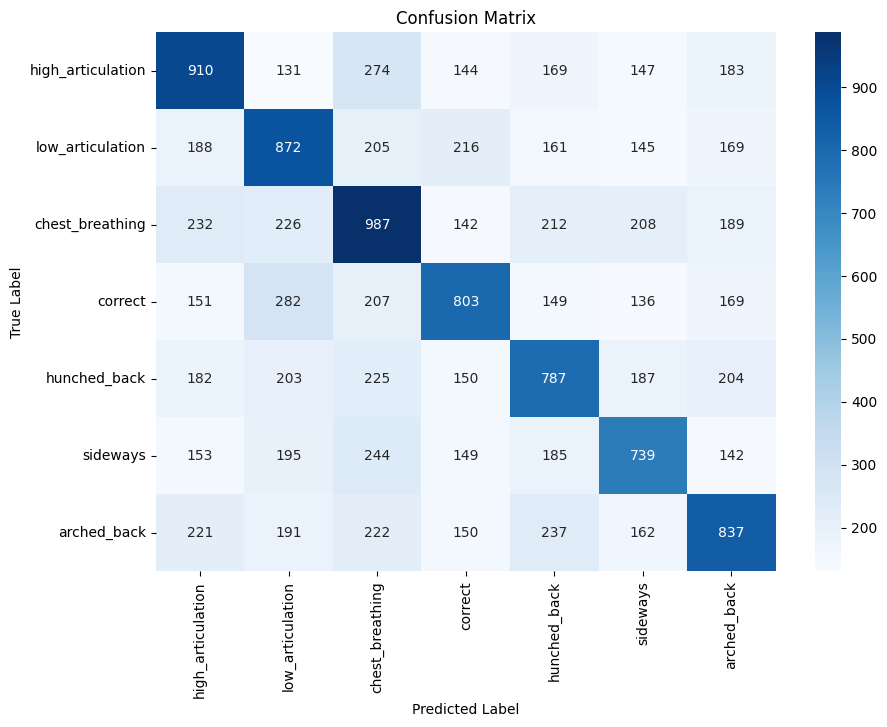

time: 31min 56s (started: 2024-08-08 10:13:31 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=7, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### RFECV

In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=4, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### PCA feature selection

In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=5, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Permutation Importance

In [ ]:
from feature_selectors import permutation_importance_selector

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

# check what are the top features according to the permutation importance
num_features = 5  # Number of top features to select
x_train_transformed, selected_features = permutation_importance_selector(pipeline, x_train, y_train, num_features)

print(selected_features)

In [ ]:
from utils import select_features

features = ['computer_mfcc_9', 'computer_mfcc_5', 'computer_mfcc_7',
       'computer_spec_cent', 'computer_mfcc_3']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

x = select_features(x, features)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Checking RFE selected features

In [ ]:
features = ['computer_pitch', 'computer_rms_energy', 'computer_tristimulus2',
       'computer_mfcc_1', 'computer_mfcc_3']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

x = select_features(x, features)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Testing accuracy with different feature numbers - k select best

In [ ]:
import os
import json
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

time: 1.64 ms (started: 2024-08-17 08:25:35 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/feature_selection_results_rf_audio.json'

In [ ]:
# Function to load results from the JSON file
def load_results(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            return json.load(file)
    return {'num_features': [], 'feature_names': [], 'f1_score': [], 'classification_report': [], 'confusion_matrix': []}

# Function to append results to the JSON file
def append_results(file_path, results):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            existing_results = json.load(file)
        for key in results:
            existing_results[key].extend(results[key])
        results = existing_results
    with open(file_path, 'w') as file:
        json.dump(results, file)

time: 2.46 ms (started: 2024-08-17 08:25:33 +00:00)


In [ ]:
# Load existing results
results = load_results(results_file_path)

# Get the number of features processed so far
start_num_features = max(results['num_features']) + 1 if results['num_features'] else 1

# Loop over the number of features starting from where we left off
for num_features in range(start_num_features, 27):
    print("Testing: ", num_features)

    # Prepare data
    x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
    class_names = y.unique()

    # Drop constant columns
    constant_columns = [col for col in x.columns if x[col].nunique() == 1]
    x = x.drop(columns=constant_columns)

    # Feature selection
    selector = SelectKBest(f_classif, k=num_features)
    x_new = selector.fit_transform(x, y)
    selected_mask = selector.get_support()
    selected_features = x.columns[selected_mask]
    print(selected_features)

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

    # Train and evaluate the model
    pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
    f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

    print(class_report)

    # Store results
    new_results = {
        'num_features': [num_features],
        'feature_names': [selected_features.tolist()],
        'f1_score': [f1],
        'classification_report': [class_report],
        'confusion_matrix': [conf_matrix.tolist()]
    }

    # Append new results to the JSON file
    append_results(results_file_path, new_results)


time: 803 ms (started: 2024-08-07 11:40:26 +00:00)


In [ ]:
import re

def plot_results(results_file_path, class_names, algorithm):
    final_results = load_results(results_file_path)
    results_df = pd.DataFrame(final_results)

    accuracy_list = []

    # Iterate over each classification report in the DataFrame
    for report in results_df['classification_report']:
        # Extract the accuracy using a regular expression
        match = re.search(r'accuracy\s+([\d.]+)', report)
        if match:
            accuracy_list.append(float(match.group(1)))
        else:
            accuracy_list.append(None)

    # Add the accuracy list as a new column in the DataFrame
    results_df['accuracy'] = accuracy_list

    # Find the best result based on accuracy
    best_idx = results_df['accuracy'].idxmax()
    best_num_features = results_df.loc[best_idx, 'num_features']
    best_accuracy = results_df.loc[best_idx, 'accuracy']
    best_class_report = results_df.loc[best_idx, 'classification_report']
    best_conf_matrix = results_df.loc[best_idx, 'confusion_matrix']

    # Print the best result
    print(f"Best number of features: {best_num_features}")
    print(f"Best Accuracy: {best_accuracy}")
    print("Best Classification Report:")
    print(best_class_report)

    # Plot confusion matrix for best result
    plot_confusion_matrix(best_conf_matrix, class_names=class_names)

    # Plot the accuracy for each number of features
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['num_features'], results_df['accuracy'], marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Number of Features: {algorithm}')
    plt.grid(True)
    plt.show()

time: 1.62 ms (started: 2024-08-17 08:25:43 +00:00)


In [ ]:
# Load final results
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/feature_selection_results_rf_audio.json'

plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='SelectKBest')

### Testing accuracy with different feature numbers - RFE

In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_feature_selection_results_rf_audio.json'


time: 1.2 ms (started: 2024-08-09 06:08:08 +00:00)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load existing results
results = load_results(results_file_path)

# Get the number of features processed so far
start_num_features = max(results['num_features']) + 1 if results['num_features'] else 1

# Loop over the number of features starting from where we left off
for num_features in range(start_num_features, 27):
    print(f"Testing with {num_features} features")

    # Prepare data
    x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
    class_names = y.unique()

    # Drop constant columns
    constant_columns = [col for col in x.columns if x[col].nunique() == 1]
    x = x.drop(columns=constant_columns)

    # Initialize RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

    # Feature selection with RFE
    rfe = RFE(estimator=rf, n_features_to_select=num_features, step=1)
    rfe.fit(x, y)
    selected_features = x.columns[rfe.support_]
    print(f"Selected features: {selected_features.tolist()}")

    # Transform the data with the selected features
    x_new = x[selected_features]

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

    # Train and evaluate the model
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, target_names=class_names)
    conf_matrix = confusion_matrix(y_test, y_pred).tolist()

    print(f"F1 Score: {f1}")
    print(f"Classification Report:\n{class_report}")

    # Store results
    new_results = {
        'num_features': [num_features],
        'feature_names': [selected_features.tolist()],
        'f1_score': [f1],
        'classification_report': [class_report],
        'confusion_matrix': [conf_matrix]
    }

    # Append new results to the JSON file
    append_results(results_file_path, new_results)

In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_feature_selection_results_rf_audio.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE')

# 3. Video only

In [ ]:
modalities = [
    "video"
]

time: 1.43 ms (started: 2024-08-07 11:43:40 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 video features

Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.868707951756495
f1 score:  0.8761608361995455
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.94      0.95      0.95      1958
 low_articulation       0.80      0.77      0.78      1956
  chest_breathing       0.89      0.90      0.90      2196
          correct       0.78      0.80      0.79      1897
     hunched_back       0.99      1.00      0.99      1938
         sideways       0.76      0.77      0.76      1807
      arched_back       0.96      0.93      0.95      2020

         accuracy                           0.88     13772
        macro avg       0.87      0.87      0.87     13772
     weighted avg       0.88      0.88      0.88     13772



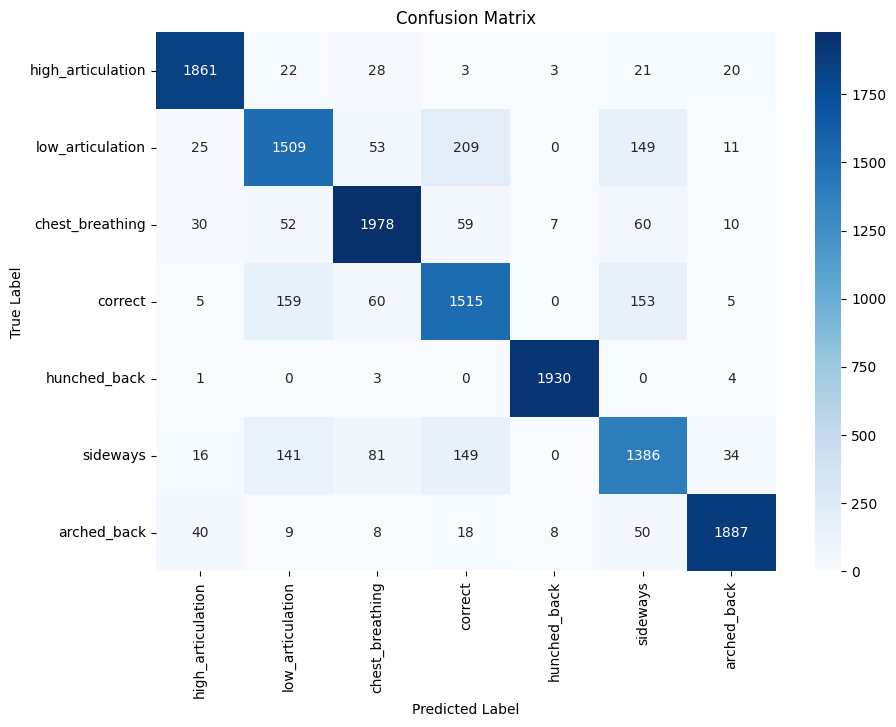

time: 5min (started: 2024-08-07 11:51:57 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# 4. Biosignal Only

In [ ]:
modalities = [
    "biosignals"
]

time: 1.27 ms (started: 2024-08-07 11:56:57 +00:00)


Mean cross-validated F1 score: 0.2885283945386932
f1 score:  0.28394038274796246
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.19      0.20      0.20      1958
 low_articulation       0.37      0.39      0.38      1956
  chest_breathing       0.21      0.22      0.21      2196
          correct       0.57      0.50      0.53      1897
     hunched_back       0.20      0.21      0.20      1938
         sideways       0.32      0.30      0.31      1807
      arched_back       0.18      0.18      0.18      2020

         accuracy                           0.28     13772
        macro avg       0.29      0.28      0.29     13772
     weighted avg       0.29      0.28      0.28     13772



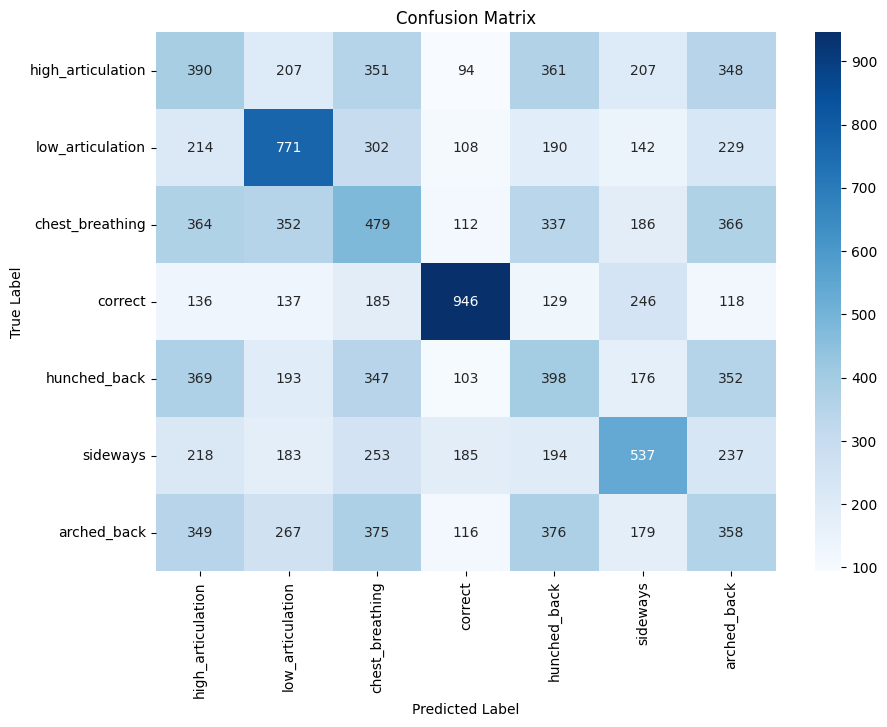

time: 3min 16s (started: 2024-08-07 11:56:57 +00:00)


In [ ]:
#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# 5. Separating classification task into smaller tasks

These models are tested only with the top 5 features selection and just audio.

## Posture.

All audio features

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Top 5 Audio SelectKBest

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Top 5 Audio with RFE

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', feature_selection=7, algorithm='rf', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

RFE loop through 4-11 features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_posture_rf_results.json'
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

# Load existing results
results = load_results(results_file_path)
# Get the number of features processed so far
start_num_features = max(results['num_features']) + 1 if results['num_features'] else 4

# Loop over the number of features starting from where we left off
for num_features in range(start_num_features, 12):
    print(f"Testing with {num_features} features")

    #prepare data
    x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', feature_selection=7, algorithm='rf', num_features=num_features, modalities='audio', conditions_to_remove=conditions_to_remove, column_name='recording_condition')
    class_names=y.unique()

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

    #train and evaluate the model
    pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
    f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

    print(f"F1 Score: {f1}")
    print(f"Classification Report:\n{class_report}")

    # Store results
    new_results = {
        'num_features': [num_features],
        'feature_names': [selected_features.tolist()],
        'f1_score': [f1],
        'classification_report': [class_report],
        'confusion_matrix': [conf_matrix.tolist()]
    }

    # Append new results to the JSON file
    append_results(results_file_path, new_results)

time: 579 ms (started: 2024-08-09 16:43:18 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_posture_rf_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE 4-way Posture')


Audio or video top 5

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio', 'video']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Audio or video, all features

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio', 'video']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Biosignal


In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['biosignals']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## Other error conditions

Audio only, top 5 selectKBest

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Audio only, all features

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

RFE top 5 audio features

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', feature_selection=7, algorithm='rf', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Audio 4-11 features test with RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_other_err_rf_results.json'
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio']

# Load existing results
results = load_results(results_file_path)
# Get the number of features processed so far
start_num_features = max(results['num_features']) + 1 if results['num_features'] else 4

# Loop over the number of features starting from where we left off
for num_features in range(start_num_features, 12):
    print(f"Testing with {num_features} features")

    #prepare data
    x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', feature_selection=7, algorithm='rf', num_features=num_features, modalities='audio', conditions_to_remove=conditions_to_remove, column_name='recording_condition')
    class_names=y.unique()

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

    #train and evaluate the model
    pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
    f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

    print(f"F1 Score: {f1}")
    print(f"Classification Report:\n{class_report}")

    # Store results
    new_results = {
        'num_features': [num_features],
        'feature_names': [selected_features.tolist()],
        'f1_score': [f1],
        'classification_report': [class_report],
        'confusion_matrix': [conf_matrix.tolist()]
    }

    # Append new results to the JSON file
    append_results(results_file_path, new_results)

time: 902 ms (started: 2024-08-10 05:21:15 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_other_err_rf_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE 4-way Other Error')

Audio or video top 5

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio', 'video']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Audio or Video, all features

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio', 'video']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Biosignal

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['biosignals']

#prepare data
x, y, selected_features = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 2-way classifiers for each error condition - Audio Only


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

def evaluate_features_rfe(data_file, conditions_to_remove, modalities, results_file_path, start_num_features=4, max_num_features=7, random_state=42, test_size=0.2):
    # Load existing results
    results = load_results(results_file_path)

    start_num_features = max(results['num_features']) + 1 if results.get('num_features') else start_num_features

    for num_features in range(start_num_features, max_num_features + 1):
        print(f"Testing with {num_features} features")

        x, y, selected_features = prepare_data(
            data_file,
            audio_source='computer',
            classify='recording_condition',
            feature_selection=7,
            algorithm='rf',
            num_features=num_features,
            modalities=modalities,
            conditions_to_remove=conditions_to_remove,
            column_name='recording_condition'
        )
        class_names = y.unique()

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)

        pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=random_state)
        f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

        print(f"F1 Score: {f1}")
        print(f"Classification Report:\n{class_report}")

        new_results = {
            'num_features': [num_features],
            'feature_names': [selected_features.tolist()],
            'f1_score': [f1],
            'classification_report': [class_report],
            'confusion_matrix': [conf_matrix.tolist()]
        }

        append_results(results_file_path, new_results)

    return class_names

time: 3.54 ms (started: 2024-08-17 12:16:42 +00:00)


In [ ]:
def plot_results_for_num_features(results_file_path, class_names, algorithm, num=4):
    final_results = load_results(results_file_path)
    results_df = pd.DataFrame(final_results)

    accuracy_list = []

    for report in results_df['classification_report']:
        match = re.search(r'accuracy\s+([\d.]+)', report)
        if match:
            accuracy_list.append(float(match.group(1)))
        else:
            accuracy_list.append(None)

    results_df['accuracy'] = accuracy_list

    # Find the result for 5 features
    five_features_df = results_df[results_df['num_features'] == num]

    if five_features_df.empty:
        print("No results found for 5 features.")
        return

    results = five_features_df.iloc[0]
    accuracy = results['accuracy']
    class_report = results['classification_report']
    conf_matrix = results['confusion_matrix']
    features_names = results['feature_names']

    print(f"Number of features: {num}")
    print("Selected Features:")
    print(features_names)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)

    plot_confusion_matrix(conf_matrix, class_names=class_names)


time: 2.02 ms (started: 2024-08-17 10:16:00 +00:00)


### Hunched back

In [ ]:
conditions_to_remove = ['arched_back', 'sideways', 'high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_hunched_results.json'

class_names = evaluate_features_rfe(
    data_file=DATA_FILE,
    conditions_to_remove=conditions_to_remove,
    modalities=modalities,
    results_file_path=results_file_path,
    start_num_features=4,
    max_num_features=8,
    random_state=RANDOM_STATE,
    test_size=0.2
)

Best number of features: 4
Best Accuracy: 0.75
Best Classification Report:
              precision    recall  f1-score   support

     correct       0.76      0.77      0.76      2196
hunched_back       0.73      0.72      0.73      1938

    accuracy                           0.75      4134
   macro avg       0.75      0.75      0.75      4134
weighted avg       0.75      0.75      0.75      4134



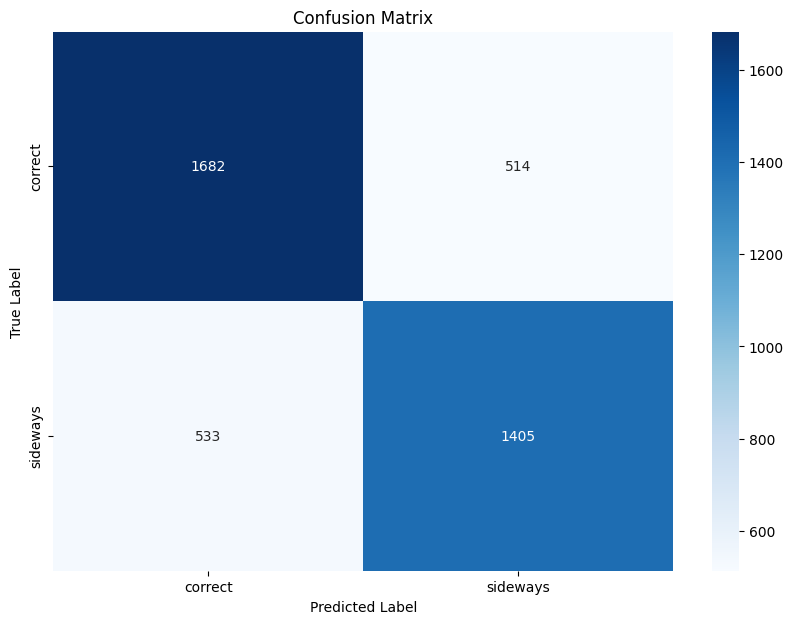

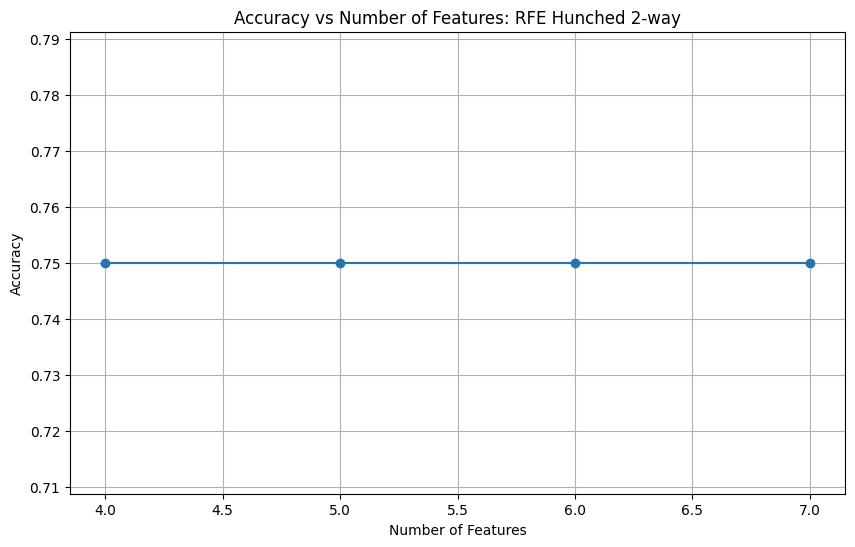

Number of features: 5
Selected Features:
['computer_pitch', 'computer_rms_energy', 'computer_spec_slope', 'computer_tristimulus2', 'computer_tristimulus3']
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

     correct       0.76      0.77      0.76      2196
hunched_back       0.74      0.72      0.73      1938

    accuracy                           0.75      4134
   macro avg       0.75      0.75      0.75      4134
weighted avg       0.75      0.75      0.75      4134



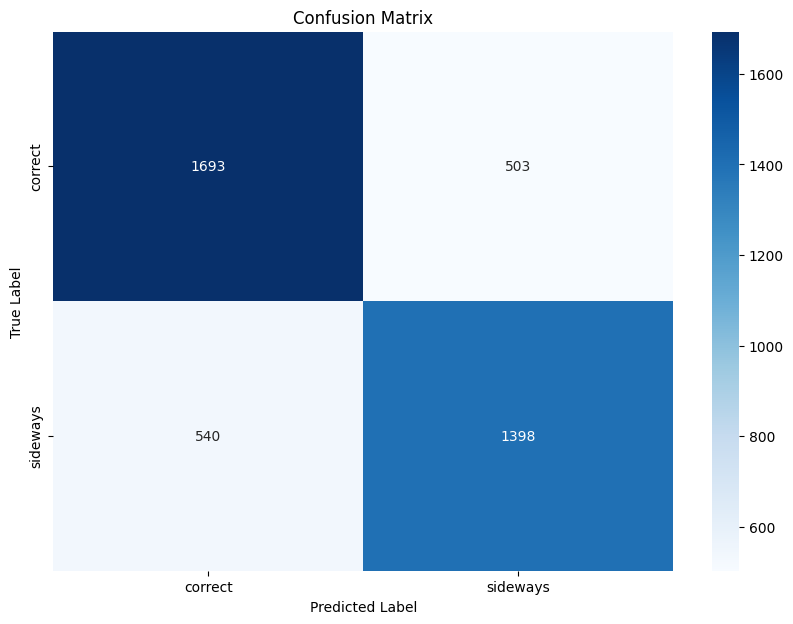

time: 1.82 s (started: 2024-08-17 10:47:02 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_hunched_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Hunched 2-way')
plot_results_for_num_features(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Hunched 2-way', num=5)

### Arched Back

In [ ]:
conditions_to_remove = ['hunched_back', 'sideways', 'high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_arched_results.json'

class_names = evaluate_features_rfe(
    data_file=DATA_FILE,
    conditions_to_remove=conditions_to_remove,
    modalities=modalities,
    results_file_path=results_file_path,
    start_num_features=4,
    max_num_features=8,
    random_state=RANDOM_STATE,
    test_size=0.2
)

Best number of features: 7
Best Accuracy: 0.74
Best Classification Report:
              precision    recall  f1-score   support

     correct       0.74      0.70      0.72      1958
 arched_back       0.74      0.78      0.76      2196

    accuracy                           0.74      4154
   macro avg       0.74      0.74      0.74      4154
weighted avg       0.74      0.74      0.74      4154



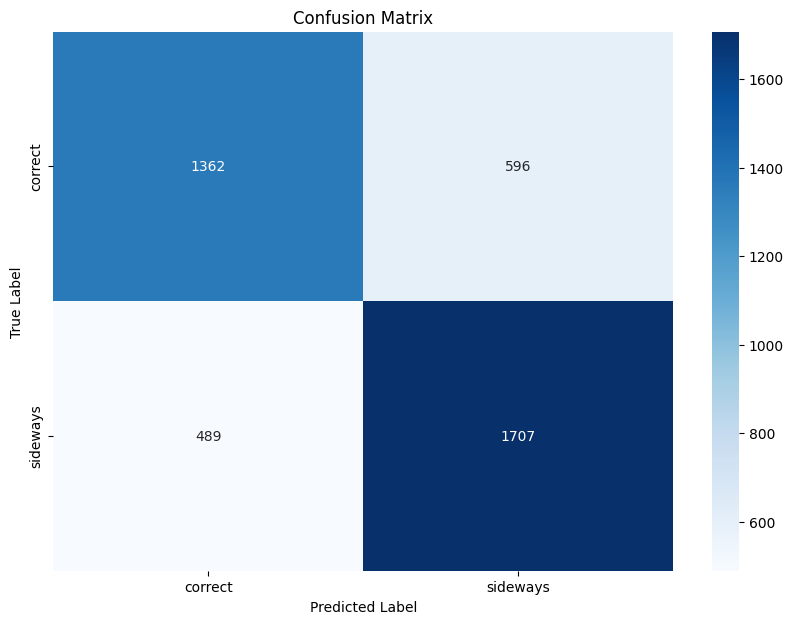

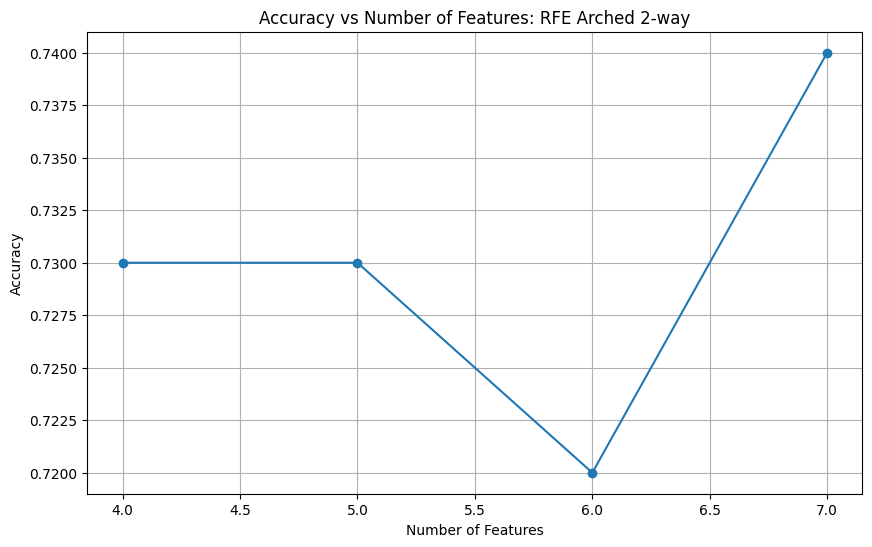

Number of features: 5
Selected Features:
['computer_pitch', 'computer_rms_energy', 'computer_tristimulus2', 'computer_mfcc_1', 'computer_mfcc_3']
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

     correct       0.73      0.69      0.71      1958
 arched_back       0.74      0.77      0.75      2196

    accuracy                           0.73      4154
   macro avg       0.73      0.73      0.73      4154
weighted avg       0.73      0.73      0.73      4154



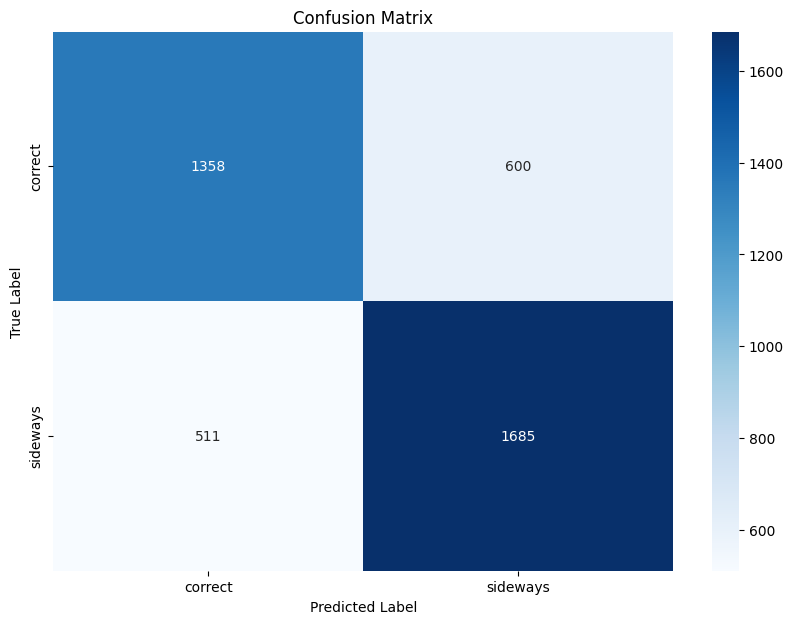

time: 3.02 s (started: 2024-08-17 10:47:22 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_arched_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Arched 2-way')
plot_results_for_num_features(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Arched 2-way', num=5)

### Sideways

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_side_results.json'

class_names = evaluate_features_rfe(
    data_file=DATA_FILE,
    conditions_to_remove=conditions_to_remove,
    modalities=modalities,
    results_file_path=results_file_path,
    start_num_features=4,
    max_num_features=8,
    random_state=RANDOM_STATE,
    test_size=0.2
)

Best number of features: 7
Best Accuracy: 0.75
Best Classification Report:
              precision    recall  f1-score   support

     correct       0.75      0.77      0.76      2196
    sideways       0.74      0.72      0.73      2020

    accuracy                           0.75      4216
   macro avg       0.75      0.74      0.74      4216
weighted avg       0.75      0.75      0.75      4216



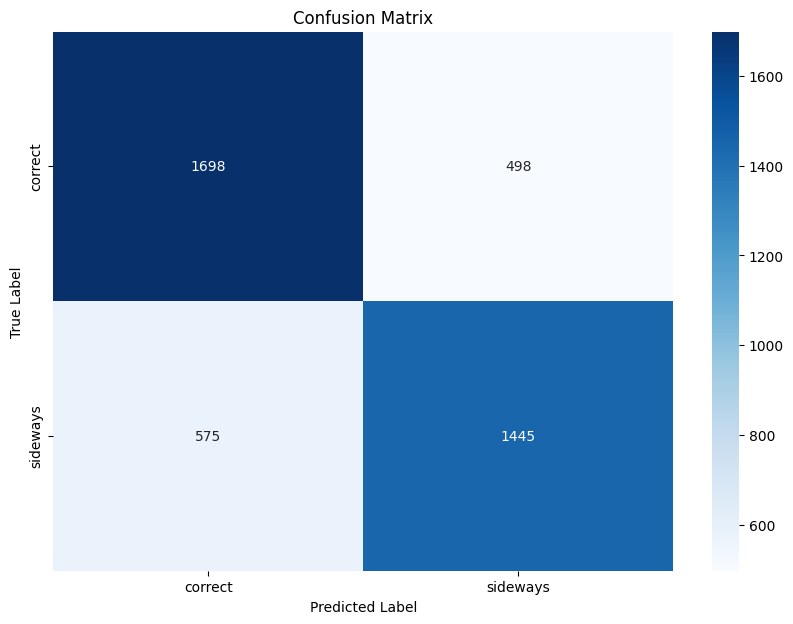

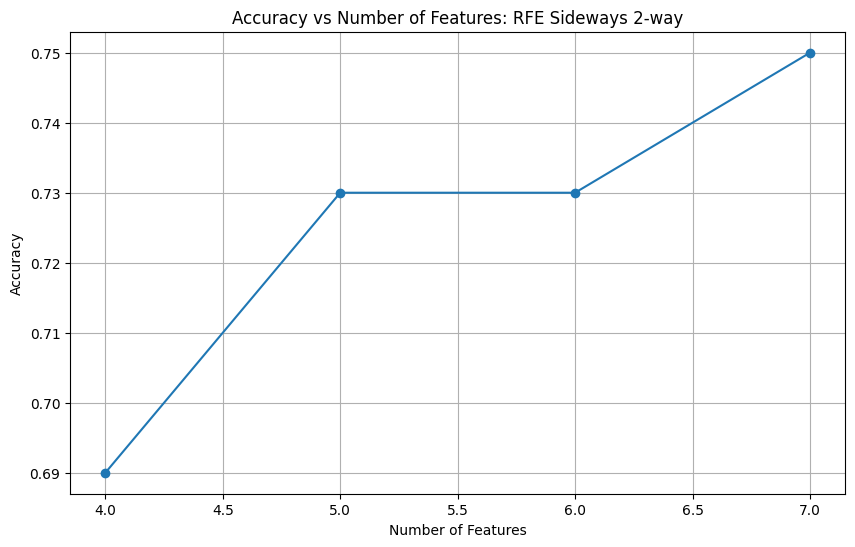

Number of features: 5
Selected Features:
['computer_pitch', 'computer_rms_energy', 'computer_spec_cent', 'computer_tristimulus2', 'computer_mfcc_1']
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

     correct       0.73      0.76      0.74      2196
    sideways       0.73      0.69      0.71      2020

    accuracy                           0.73      4216
   macro avg       0.73      0.73      0.73      4216
weighted avg       0.73      0.73      0.73      4216



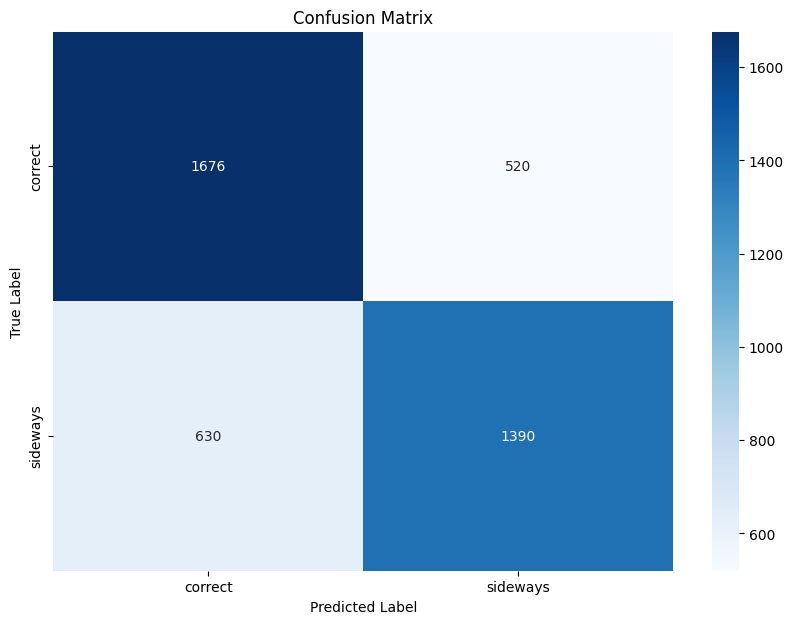

time: 5.1 s (started: 2024-08-17 10:48:02 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_side_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Sideways 2-way')
plot_results_for_num_features(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Sideways 2-way', num=5)

### High articulation

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways', 'low_articulation', 'chest_breathing']
modalities = ['audio']
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_high_art_results.json'

class_names = evaluate_features_rfe(
    data_file=DATA_FILE,
    conditions_to_remove=conditions_to_remove,
    modalities=modalities,
    results_file_path=results_file_path,
    start_num_features=4,
    max_num_features=8,
    random_state=RANDOM_STATE,
    test_size=0.2
)

Best number of features: 6
Best Accuracy: 0.77
Best Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.76      0.83      0.79      2196
          correct       0.78      0.70      0.74      1897

         accuracy                           0.77      4093
        macro avg       0.77      0.76      0.77      4093
     weighted avg       0.77      0.77      0.77      4093



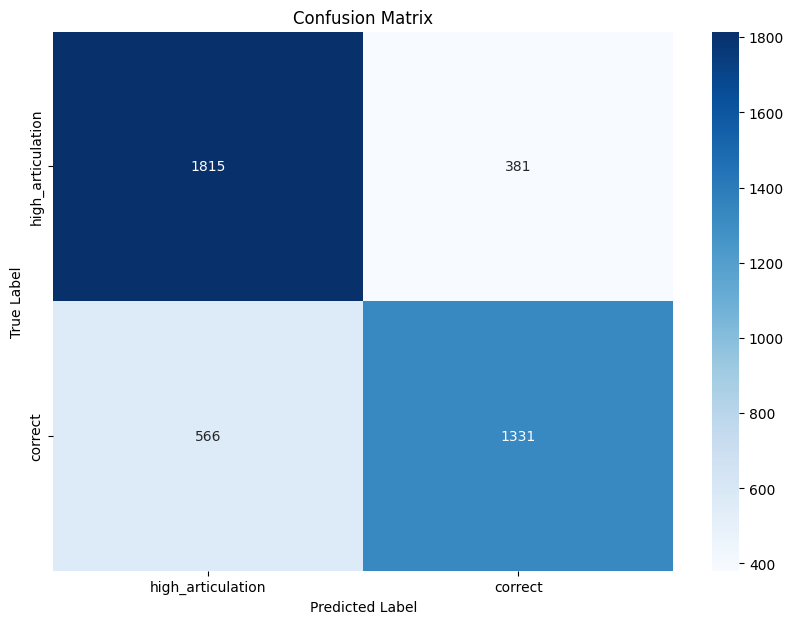

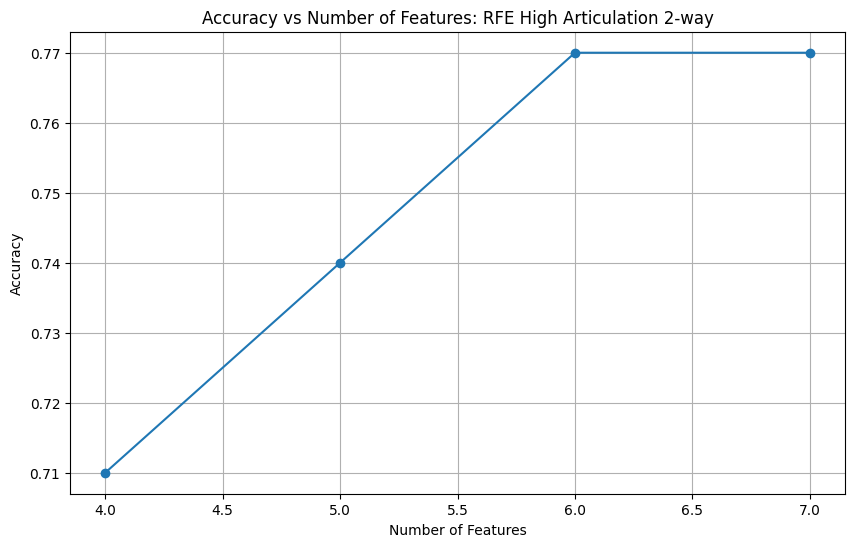

time: 530 ms (started: 2024-08-17 11:19:43 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_high_art_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE High Articulation 2-way')
plot_results_for_num_features(results_file_path=results_file_path, class_names=class_names, algorithm='RFE High Articulation 2-way', num=5)

### Low Articulation

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways', 'high_articulation', 'chest_breathing']
modalities = ['audio']
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_low_art_results.json'

class_names = evaluate_features_rfe(
    data_file=DATA_FILE,
    conditions_to_remove=conditions_to_remove,
    modalities=modalities,
    results_file_path=results_file_path,
    start_num_features=4,
    max_num_features=8,
    random_state=RANDOM_STATE,
    test_size=0.2
)

Best number of features: 8
Best Accuracy: 0.76
Best Classification Report:
                  precision    recall  f1-score   support

low_articulation       0.76      0.82      0.79      2196
         correct       0.76      0.69      0.72      1807

        accuracy                           0.76      4003
       macro avg       0.76      0.76      0.76      4003
    weighted avg       0.76      0.76      0.76      4003



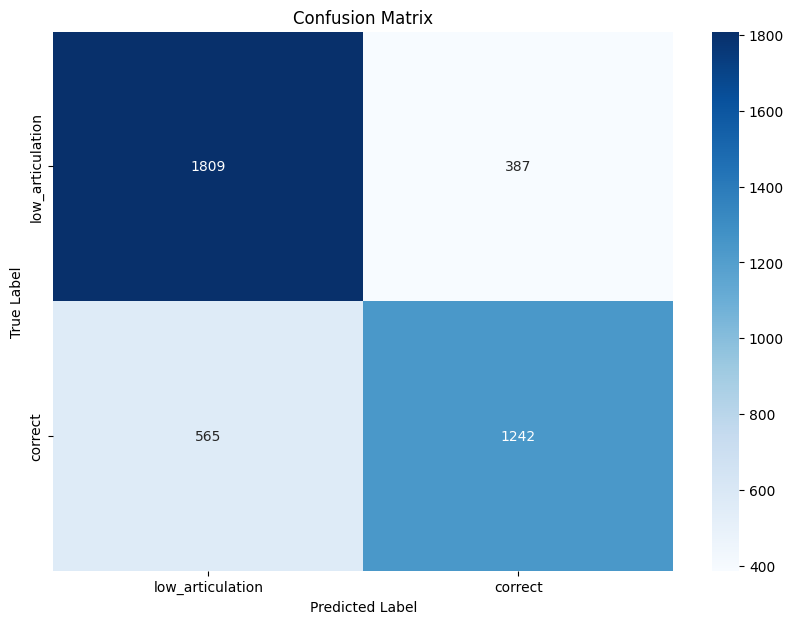

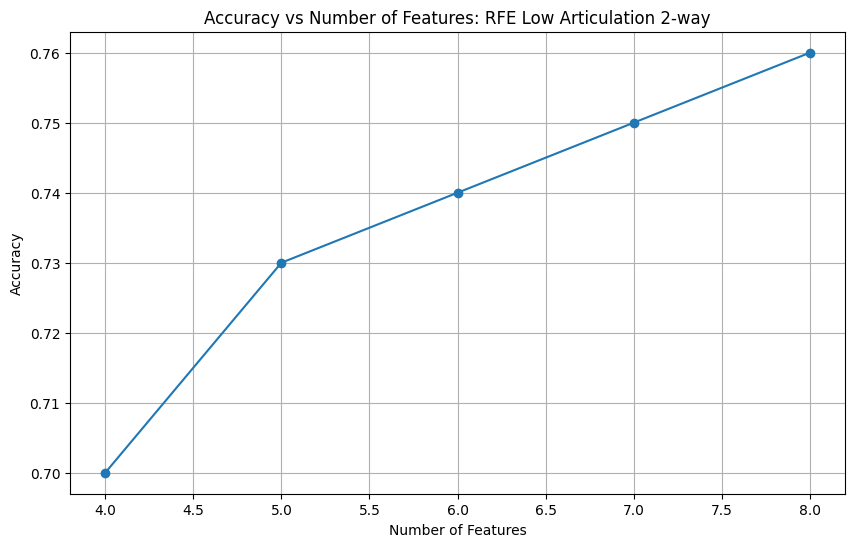

Number of features: 5
Selected Features:
['computer_pitch', 'computer_rms_energy', 'computer_spec_cent', 'computer_spec_slope', 'computer_tristimulus1']
Accuracy: 0.73
Classification Report:
                  precision    recall  f1-score   support

low_articulation       0.74      0.79      0.76      2196
         correct       0.72      0.67      0.69      1807

        accuracy                           0.73      4003
       macro avg       0.73      0.73      0.73      4003
    weighted avg       0.73      0.73      0.73      4003



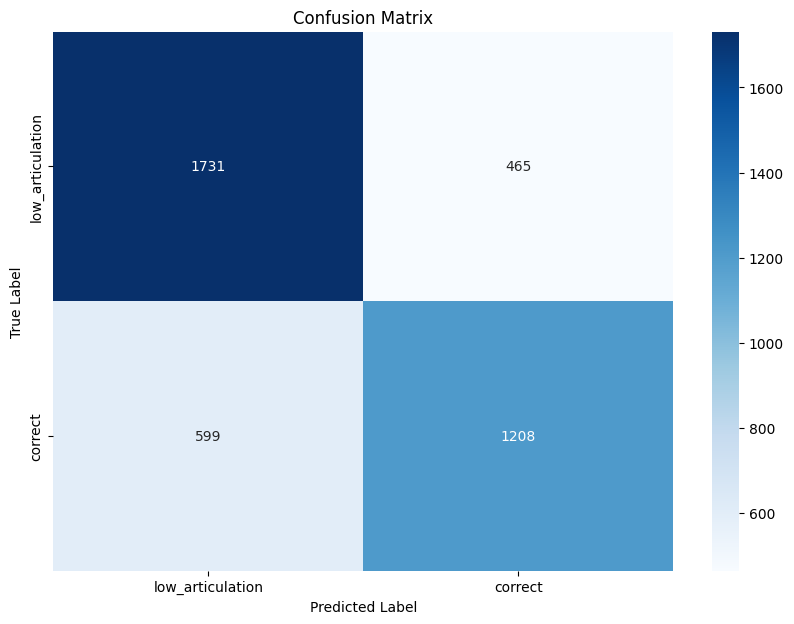

time: 1.39 s (started: 2024-08-17 12:44:06 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_low_art_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Low Articulation 2-way')
plot_results_for_num_features(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Low Articulation 2-way', num=5)

### Chest Breathing

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways', 'high_articulation', 'low_articulation']
modalities = ['audio']
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_chest_results.json'

class_names = evaluate_features_rfe(
    data_file=DATA_FILE,
    conditions_to_remove=conditions_to_remove,
    modalities=modalities,
    results_file_path=results_file_path,
    start_num_features=4,
    max_num_features=8,
    random_state=RANDOM_STATE,
    test_size=0.2
)

Best number of features: 8
Best Accuracy: 0.77
Best Classification Report:
                 precision    recall  f1-score   support

chest_breathing       0.76      0.75      0.76      1956
        correct       0.78      0.79      0.79      2195

       accuracy                           0.77      4151
      macro avg       0.77      0.77      0.77      4151
   weighted avg       0.77      0.77      0.77      4151



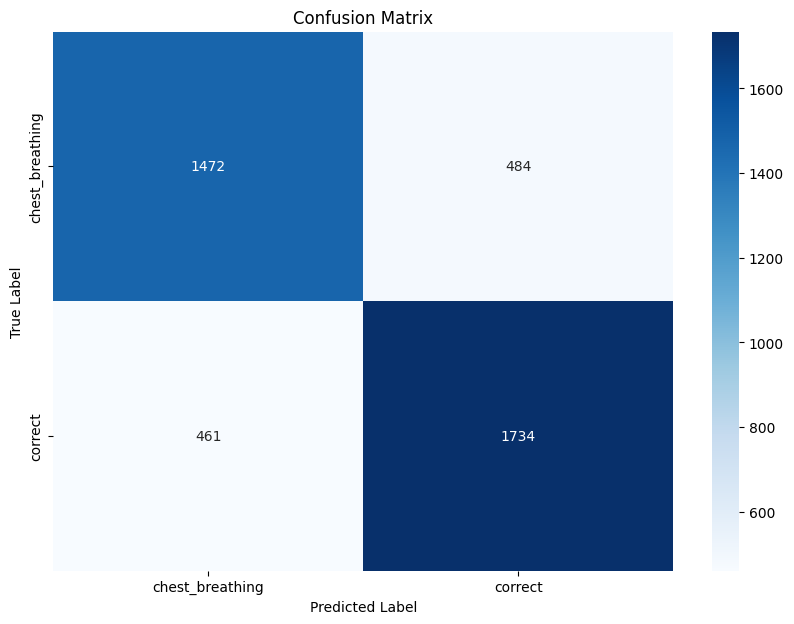

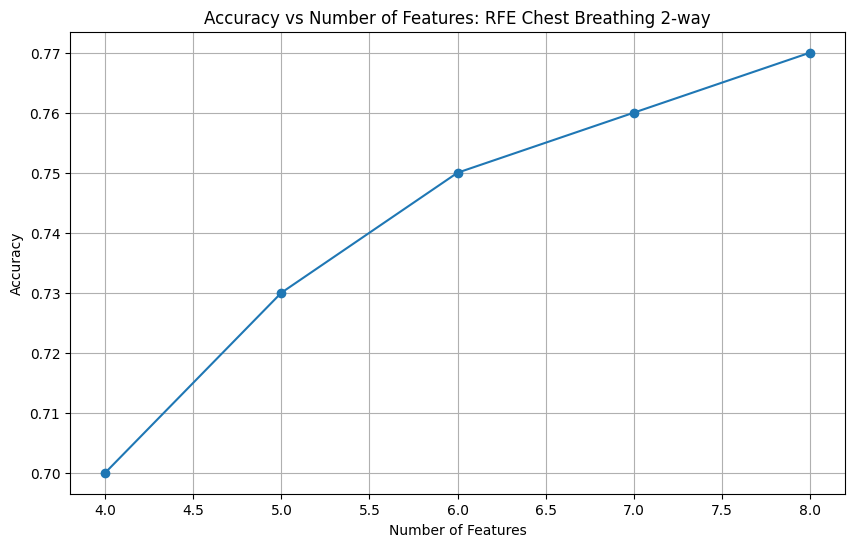

Number of features: 5
Selected Features:
['computer_pitch', 'computer_rms_energy', 'computer_mfcc_1', 'computer_mfcc_4', 'computer_mfcc_5']
Accuracy: 0.73
Classification Report:
                 precision    recall  f1-score   support

chest_breathing       0.72      0.71      0.72      1956
        correct       0.75      0.75      0.75      2195

       accuracy                           0.73      4151
      macro avg       0.73      0.73      0.73      4151
   weighted avg       0.73      0.73      0.73      4151



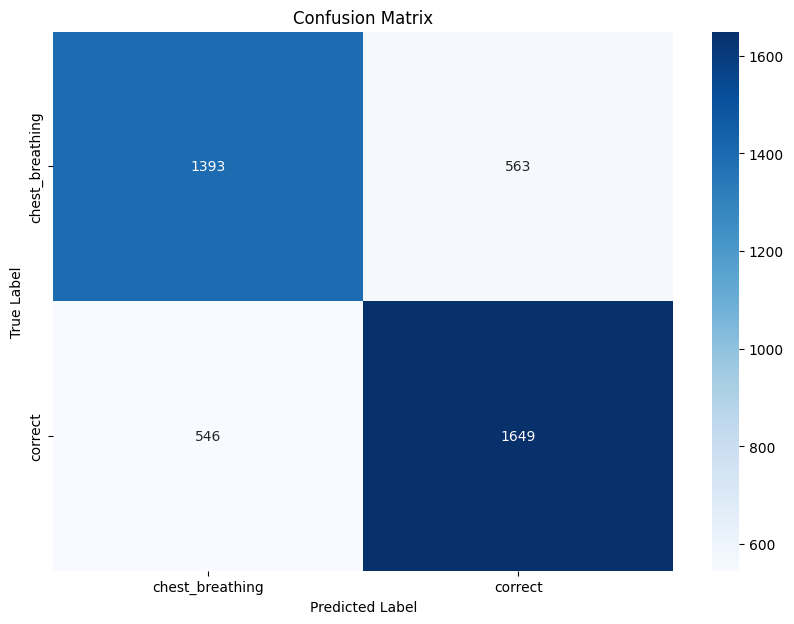

time: 1.2 s (started: 2024-08-17 13:20:14 +00:00)


In [ ]:
results_file_path = '/content/drive/My Drive/THESIS/classifiers/data/rfe_chest_results.json'
plot_results(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Chest Breathing 2-way')
plot_results_for_num_features(results_file_path=results_file_path, class_names=class_names, algorithm='RFE Chest Breathing 2-way', num=5)